# **Data Cleaning and Preparation**

In [ ]:
#importing libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload file(csv) :
from google.colab import files
uploaded = files.upload()

Saving Calender_data.csv to Calender_data (1).csv


In [ ]:
#store the file into df(variable) :
df = pd.read_csv('Calender_data.csv', encoding='latin1')

In [ ]:
#display first 5 rows :

df.head()

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,9,01/01/2020,All Day,united states,NaN,NaN,United States - New Year's Day,NaN,NaN,NaN
1,9,01/01/2020,All Day,united kingdom,NaN,NaN,United Kingdom - New Year's Day,NaN,NaN,NaN
2,9,01/01/2020,All Day,germany,NaN,NaN,Germany - New Year's Day,NaN,NaN,NaN
3,9,01/01/2020,All Day,switzerland,NaN,NaN,Switzerland - New Year's Day,NaN,NaN,NaN
4,9,01/01/2020,All Day,italy,NaN,NaN,Italy - New Year's Day,NaN,NaN,NaN


In [ ]:
df

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,9,01/01/2020,All Day,united states,NaN,NaN,United States - New Year's Day,NaN,NaN,NaN
1,9,01/01/2020,All Day,united kingdom,NaN,NaN,United Kingdom - New Year's Day,NaN,NaN,NaN
2,9,01/01/2020,All Day,germany,NaN,NaN,Germany - New Year's Day,NaN,NaN,NaN
3,9,01/01/2020,All Day,switzerland,NaN,NaN,Switzerland - New Year's Day,NaN,NaN,NaN
4,9,01/01/2020,All Day,italy,NaN,NaN,Italy - New Year's Day,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
663492,98,07/09/2020,All Day,canada,NaN,NaN,Canada - Labor Day,NaN,NaN,NaN
663493,173,07/09/2020,All Day,brazil,NaN,NaN,Brazil - Independence Day,NaN,NaN,NaN
663494,328,07/09/2020,All Day,bulgaria,NaN,NaN,Bulgaria - Unification Day,NaN,NaN,NaN
663495,354,07/09/2020,All Day,thailand,NaN,NaN,Thailand - Songkran Festival,NaN,NaN,NaN


In [ ]:
#display the shape of dataset :
df.shape

(663497, 12)

In [ ]:
#display null columns :

df.isnull().sum()

,0
id,0
date,0
time,6610
zone,0
currency,548207
importance,548207
event,0
actual,556740
forecast,623180
previous,556679


In [ ]:
#fill missing time,currency and importance with Unknown :
df['time'].fillna('Unknown', inplace=True)
df['currency'].fillna('Unknown', inplace=True)
df['importance'].fillna('Unknown', inplace=True)

#fill missing actual,forecast and previous with 0 :
df['actual'].fillna(0, inplace=True)
df['forecast'].fillna(0, inplace=True)
df['previous'].fillna(0, inplace=True)

/tmp/ipython-input-3986909794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3986909794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Display null columns :

df.isnull().sum()

,0
id,0
date,0
time,0
zone,0
currency,0
importance,0
event,0
actual,0
forecast,0
previous,0


In [ ]:
df

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,9,01/01/2020,All Day,united states,Unknown,Unknown,United States - New Year's Day,0,0,0
1,9,01/01/2020,All Day,united kingdom,Unknown,Unknown,United Kingdom - New Year's Day,0,0,0
2,9,01/01/2020,All Day,germany,Unknown,Unknown,Germany - New Year's Day,0,0,0
3,9,01/01/2020,All Day,switzerland,Unknown,Unknown,Switzerland - New Year's Day,0,0,0
4,9,01/01/2020,All Day,italy,Unknown,Unknown,Italy - New Year's Day,0,0,0
...,...,...,...,...,...,...,...,...,...,...
663492,98,07/09/2020,All Day,canada,Unknown,Unknown,Canada - Labor Day,0,0,0
663493,173,07/09/2020,All Day,brazil,Unknown,Unknown,Brazil - Independence Day,0,0,0
663494,328,07/09/2020,All Day,bulgaria,Unknown,Unknown,Bulgaria - Unification Day,0,0,0
663495,354,07/09/2020,All Day,thailand,Unknown,Unknown,Thailand - Songkran Festival,0,0,0


In [ ]:
#display the information of each column :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663497 entries, 0 to 663496
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          663497 non-null  int64 
 1   date        663497 non-null  object
 2   time        663497 non-null  object
 3   zone        663497 non-null  object
 4   currency    663497 non-null  object
 5   importance  663497 non-null  object
 6   event       663497 non-null  object
 7   actual      663497 non-null  object
 8   forecast    663497 non-null  object
 9   previous    663497 non-null  object
dtypes: int64(1), object(9)
memory usage: 50.6+ MB


In [ ]:
#re-convert date column to datetime format, specifying the correct format :

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663497 entries, 0 to 663496
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          663497 non-null  int64         
 1   date        663497 non-null  datetime64[ns]
 2   time        663497 non-null  object        
 3   zone        663497 non-null  object        
 4   currency    663497 non-null  object        
 5   importance  663497 non-null  object        
 6   event       663497 non-null  object        
 7   actual      663497 non-null  object        
 8   forecast    663497 non-null  object        
 9   previous    663497 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 50.6+ MB


In [ ]:
#shows unique value in zone columns :

unique_values = df['zone'].unique()
print(unique_values)

['united states' 'united kingdom' 'germany' 'switzerland' 'italy'
 'netherlands' 'norway' 'france' 'portugal' 'spain' 'sweden' 'belgium'
 'denmark' 'finland' 'austria' 'australia' 'singapore' 'japan' 'hong kong'
 'south africa' 'hungary' 'poland' 'kuwait' 'jordan'
 'united arab emirates' 'lebanon' 'qatar' 'morocco' 'argentina' 'bahrain'
 'russia' 'greece' 'chile' 'romania' 'bulgaria' 'croatia' 'brazil'
 'tunisia' 't?¬rkiye' 'canada' 'iceland' 'mexico' 'china' 'colombia'
 'czech republic' 'indonesia' 'ireland' 'kenya' 'south korea' 'luxembourg'
 'malaysia' 'peru' 'philippines' 'slovenia' 'taiwan' 'thailand' 'ukraine'
 'venezuela' 'vietnam' 'namibia' 'uganda' 'botswana' 'cyprus' 'estonia'
 'latvia' 'lithuania' 'malta' 'new zealand' 'mauritius' 'malawi'
 'tanzania' 'zimbabwe' 'rwanda' 'costa rica' 'nigeria' 'zambia'
 'bosnia-herzegovina' 'serbia' "cote d'ivoire" 'iraq' 'kazakhstan'
 'jamaica' 'montenegro' 'mongolia' 'egypt' 'slovakia' 'sri lanka' 'india'
 'euro zone' 'israel' 'oman' 'saud

#EDA(Exploratory Data Analysis)

Count of holiday-only entries:
is_holiday_only
True     556632
False    106865
Name: count, dtype: int64


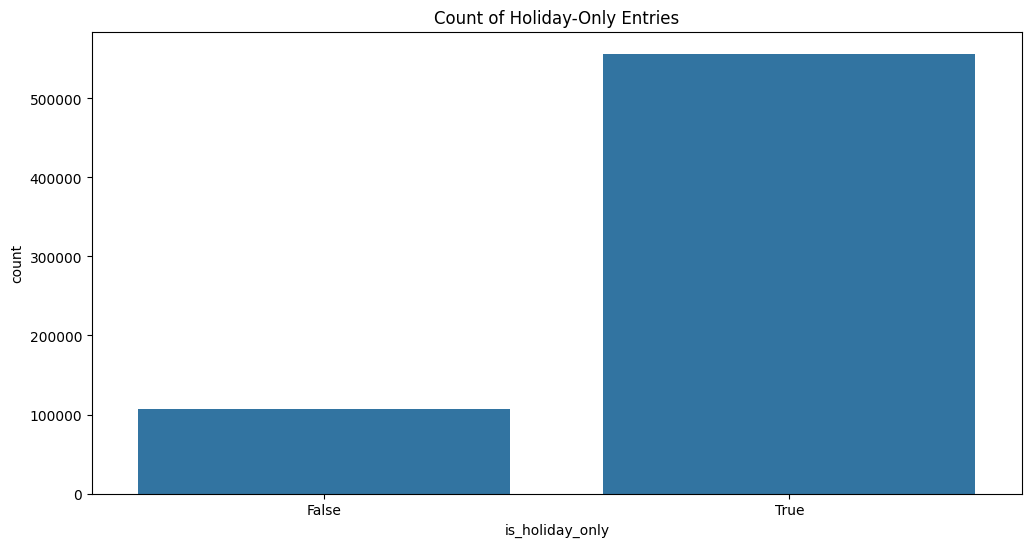

In [ ]:
#create and display a new column is_holiday_only where True indicates actual, forecast, and previous are all 0 :

df['is_holiday_only'] = (df['actual'] == 0) & (df['forecast'] == 0) & (df['previous'] == 0)

print("Count of holiday-only entries:")
print(df['is_holiday_only'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x='is_holiday_only', data=df)
plt.title('Count of Holiday-Only Entries')
plt.show()

In [ ]:
df

,id,date,time,zone,currency,importance,event,actual,forecast,previous,is_holiday_only
0,9,2020-01-01,All Day,united states,Unknown,Unknown,United States - New Year's Day,0,0,0,True
1,9,2020-01-01,All Day,united kingdom,Unknown,Unknown,United Kingdom - New Year's Day,0,0,0,True
2,9,2020-01-01,All Day,germany,Unknown,Unknown,Germany - New Year's Day,0,0,0,True
3,9,2020-01-01,All Day,switzerland,Unknown,Unknown,Switzerland - New Year's Day,0,0,0,True
4,9,2020-01-01,All Day,italy,Unknown,Unknown,Italy - New Year's Day,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
663492,98,2020-09-07,All Day,canada,Unknown,Unknown,Canada - Labor Day,0,0,0,True
663493,173,2020-09-07,All Day,brazil,Unknown,Unknown,Brazil - Independence Day,0,0,0,True
663494,328,2020-09-07,All Day,bulgaria,Unknown,Unknown,Bulgaria - Unification Day,0,0,0,True
663495,354,2020-09-07,All Day,thailand,Unknown,Unknown,Thailand - Songkran Festival,0,0,0,True


Number of Events per Country:
         Country  Number of Events
0  united states             30508
1          egypt             24366
2        tunisia             21221
3           oman             20352
4      sri lanka             18802
5          japan             13541
6          china             11471
7     bangladesh             11341
8        lebanon             10922
9         taiwan             10495


/tmp/ipython-input-2599237601.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Number of Events', data=events_per_country.head(10), palette='viridis')


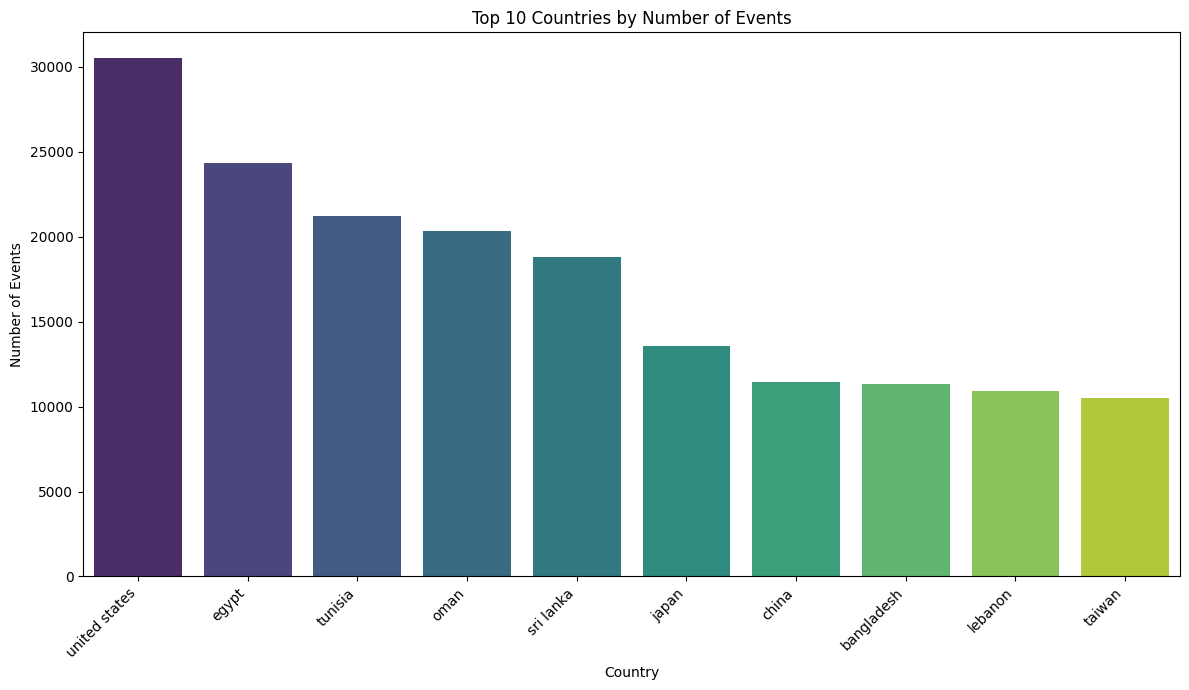

In [ ]:
#count the number of events per country :

events_per_country = df['zone'].value_counts().reset_index()
events_per_country.columns = ['Country', 'Number of Events']

print("Number of Events per Country:")
print(events_per_country.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x='Country', y='Number of Events', data=events_per_country.head(10), palette='viridis')
plt.title('Top 10 Countries by Number of Events')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#filter for economic events (where actual, forecast, or previous are not all 0) :
economic_events_df = df[~df['is_holiday_only']].copy()

#extract year and month from the date column :
economic_events_df['year'] = economic_events_df['date'].dt.year
economic_events_df['month'] = economic_events_df['date'].dt.month

#count economic events per month/year :
economic_events_count = economic_events_df.groupby(['year', 'month']).size().reset_index(name='Number of Economic Events')

print("Economic Events per Month/Year:")
print(economic_events_count.head(10))

Economic Events per Month/Year:
   year  month  Number of Economic Events
0  2020      1                       1529
1  2020      2                       1436
2  2020      3                       1554
3  2020      4                       1457
4  2020      5                       1521
5  2020      6                       1520
6  2020      7                       1493
7  2020      8                       1488
8  2020      9                       1528
9  2020     10                       1497


Events Grouped by Currency and Economic Region (Top 10):
    currency                  zone  Number of Events
71       USD         united states             26653
92   Unknown                 egypt             23966
156  Unknown               tunisia             21221
130  Unknown                  oman             20018
149  Unknown             sri lanka             18801
76   Unknown            bangladesh             11341
114  Unknown               lebanon             10922
159  Unknown  united arab emirates              9732
153  Unknown                taiwan              9573
84   Unknown                 china              9510


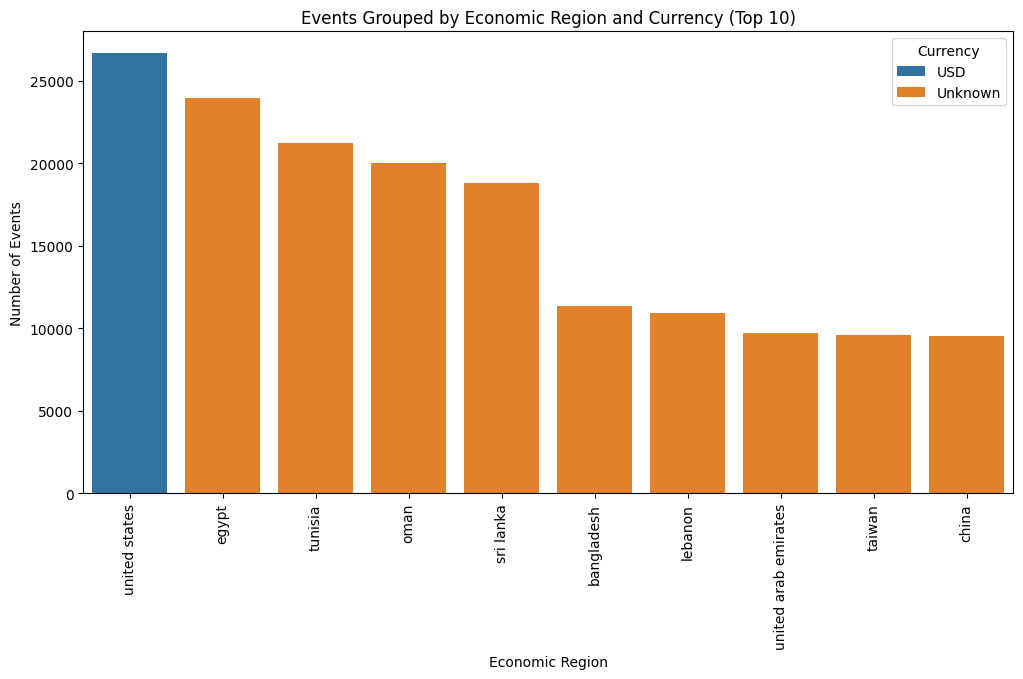

In [ ]:
#group events by currency and zone and count them :

events_by_currency_region = df.groupby(['currency', 'zone']).size().reset_index(name='Number of Events')

print("Events Grouped by Currency and Economic Region (Top 10):")
print(events_by_currency_region.sort_values(by='Number of Events', ascending=False).head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='Number of Events', hue='currency', data=events_by_currency_region.sort_values(by='Number of Events', ascending=False).head(10))
plt.xticks(rotation=90)
plt.xlabel('Economic Region')
plt.ylabel('Number of Events')
plt.title('Events Grouped by Economic Region and Currency (Top 10)')
plt.legend(title='Currency')
plt.show()

# **Classification Model**

In [ ]:
for col in ['actual', 'forecast', 'previous']:
    #convert to string to handle various input types consistently :
    df[col] = df[col].astype(str)
    #remove '%' sign :
    df[col] = df[col].str.replace('%', '', regex=False)
    #convert to numeric :
    df[col] = pd.to_numeric(df[col], errors='coerce')
    #fill NaN values with 0 :
    df[col] = df[col].fillna(0)

#verify the data types :
print("Data types after conversion:")
print(df[['actual', 'forecast', 'previous']].dtypes)

Data types after conversion:
actual      float64
forecast    float64
previous    float64
dtype: object


First 5 rows of X_encoded after re-encoding:
   actual  forecast  previous  ...  time_All Day  time_Tentative  time_Unknown
0     0.0       0.0       0.0  ...          True           False         False
1     0.0       0.0       0.0  ...          True           False         False
2     0.0       0.0       0.0  ...          True           False         False
3     0.0       0.0       0.0  ...          True           False         False
4     0.0       0.0       0.0  ...          True           False         False

[5 rows x 1102 columns]

Shape of X_train after re-split: (530797, 1102)
Shape of X_test after re-split: (132700, 1102)

Training RandomForestClassifier with cleaned data...
Model training complete.

Model Performance:
Accuracy: 0.9776
Precision: 0.9776
Recall: 0.9776
F1-Score: 0.9775


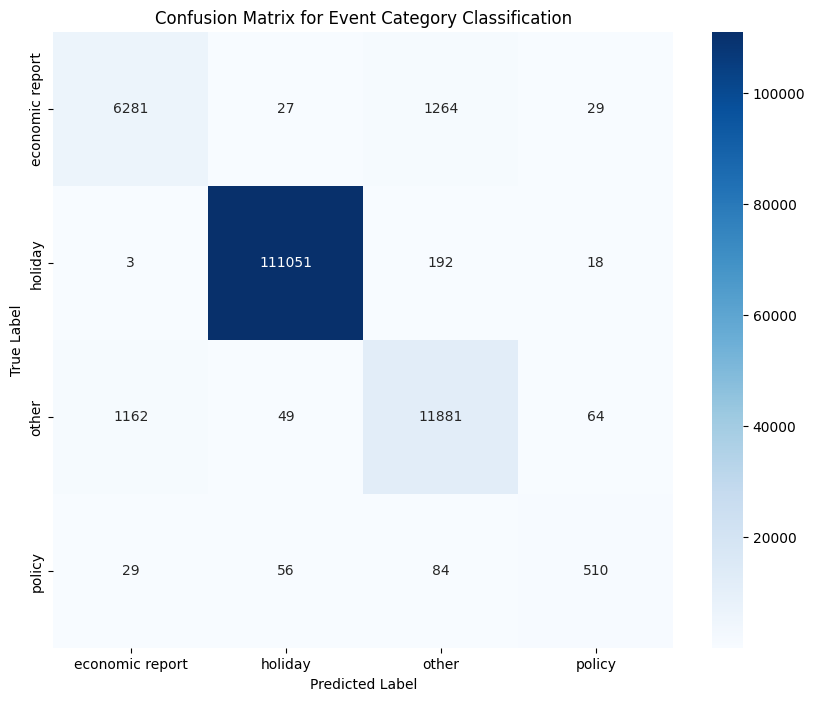


Summary of Model Performance:
The Random Forest Classifier was used to predict the event category. 
It achieved an accuracy of 97.76%, meaning 97.76% of the predictions were correct.
The weighted precision of 0.9776, recall of 0.9776, and F1-score of 0.9775 indicate good overall performance across different event categories, considering class imbalances.
The confusion matrix visually confirms the distribution of correct and incorrect predictions for each category.


/tmp/ipython-input-1056784014.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='importance', data=feature_importances.head(20), palette='viridis') # Plot top 20 features


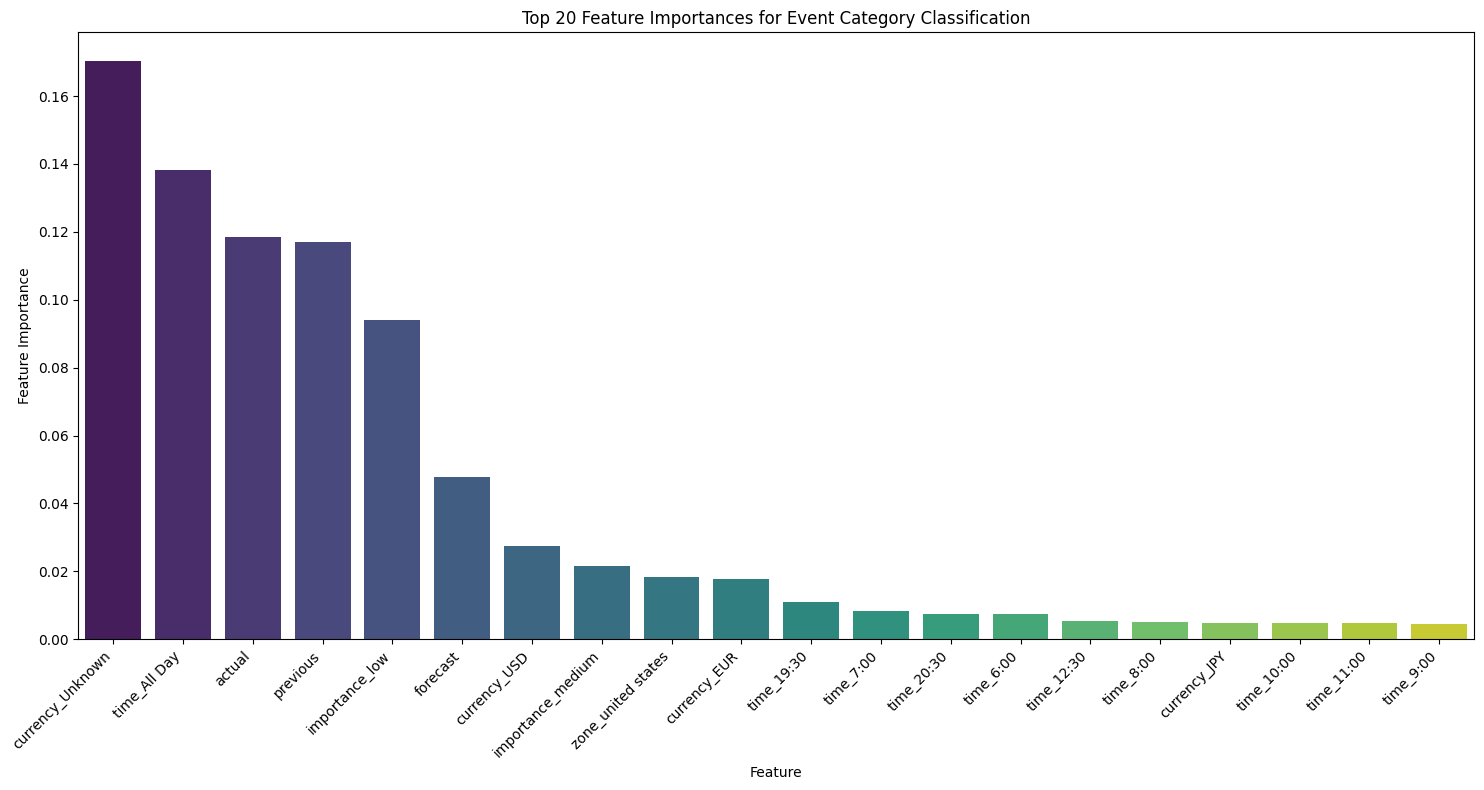

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#re-initialize event_category column with other :
df['event_category'] = 'other'

#update event_category for holiday-only entries :
df.loc[df['is_holiday_only'] == True, 'event_category'] = 'holiday'

#identify economic report events :
economic_keywords = [
    'GDP', 'CPI', 'PMI', 'Unemployment Rate', 'Interest Rate', 'Inflation',
    'Trade Balance', 'Retail Sales', 'Industrial Production', 'Consumer Confidence'
]
for keyword in economic_keywords:
    df.loc[df['event'].str.contains(keyword, case=False, na=False), 'event_category'] = 'economic report'

#identify policy events :
policy_keywords = ['Monetary Policy', 'Fiscal Policy', 'Central Bank', 'Rate Decision', 'Budget']
for keyword in policy_keywords:
    df.loc[df['event'].str.contains(keyword, case=False, na=False), 'event_category'] = 'policy'

#define feature columns X and y :
feature_columns = ['zone', 'currency', 'importance', 'time', 'actual', 'forecast', 'previous']
X = df[feature_columns]
y = df['event_category']

#identify categorical columns :
categorical_cols = ['zone', 'currency', 'importance', 'time']

#one-hot encoding for categorical features :
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("First 5 rows of X_encoded after re-encoding:")
print(X_encoded.head())

#data splitting into training and testing :
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train after re-split: {X_train.shape}")
print(f"Shape of X_test after re-split: {X_test.shape}")

#initialize and train Random Forest Classifier model :
print("\nTraining RandomForestClassifier with cleaned data...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
model.fit(X_train, y_train)
print("Model training complete.")

#prediction :
y_pred = model.predict(X_test)

#evaluate model's performance :
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#visualize the confusion matrix :
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Event Category Classification')
plt.show()

#summarize the model's performance :
print("\nSummary of Model Performance:")
print("The Random Forest Classifier was used to predict the event category. ")
print(f"It achieved an accuracy of {accuracy*100:.2f}%, meaning {accuracy*100:.2f}% of the predictions were correct.")
print(f"The weighted precision of {precision:.4f}, recall of {recall:.4f}, and F1-score of {f1:.4f} indicate good overall performance across different event categories, considering class imbalances.")
print("The confusion matrix visually confirms the distribution of correct and incorrect predictions for each category.")

#create a DataFrame for feature importances :
feature_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
})

#sort the features by importance for better visualization :
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='feature', y='importance', data=feature_importances.head(20), palette='viridis') # Plot top 20 features
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top 20 Feature Importances for Event Category Classification')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#create a sample new event (mimicking the original df structure) :
sample_event = pd.DataFrame({
    'zone': ['united states'],
    'currency': ['Unknown'],
    'importance': ['Unknown'],
    'time': ['All Day'],
    'actual': [0.0],
    'forecast': [0.0],
    'previous': [0.0],
    'event': ['New Year Day Holiday']
})

#create another sample event for an economic report :
sample_economic_event = pd.DataFrame({
    'zone': ['united states'],
    'currency': ['USD'],
    'importance': ['high'],
    'time': ['10:00 AM'],
    'actual': [2.5],
    'forecast': [2.2],
    'previous': [2.0],
    'event': ['GDP Growth Rate']
})

#combine sample events  :
sample_df = pd.concat([sample_event, sample_economic_event], ignore_index=True)

#identify categorical columns :
categorical_cols = ['zone', 'currency', 'importance', 'time']

#one-hot encode the sample data
# I'll use reindex to add any missing columns and fill with 0, and drop extra columns :
sample_X_encoded = pd.get_dummies(sample_df[feature_columns], columns=categorical_cols, drop_first=True)
sample_X_encoded = sample_X_encoded.reindex(columns=X_encoded.columns, fill_value=False)

#make predictions using the trained model :
predictions = model.predict(sample_X_encoded)

print("\n--- Sample Event 1 ---")
print(sample_df.iloc[0])
print(f"Predicted Category: {predictions[0]}")

print("\n--- Sample Event 2 ---")
print(sample_df.iloc[1])
print(f"Predicted Category: {predictions[1]}")



--- Sample Event 1 ---
zone                 united states
currency                   Unknown
importance                 Unknown
time                       All Day
actual                         0.0
forecast                       0.0
previous                       0.0
event         New Year Day Holiday
Name: 0, dtype: object
Predicted Category: holiday

--- Sample Event 2 ---
zone            united states
currency                  USD
importance               high
time                 10:00 AM
actual                    2.5
forecast                  2.2
previous                  2.0
event         GDP Growth Rate
Name: 1, dtype: object
Predicted Category: policy


## **Visualization**

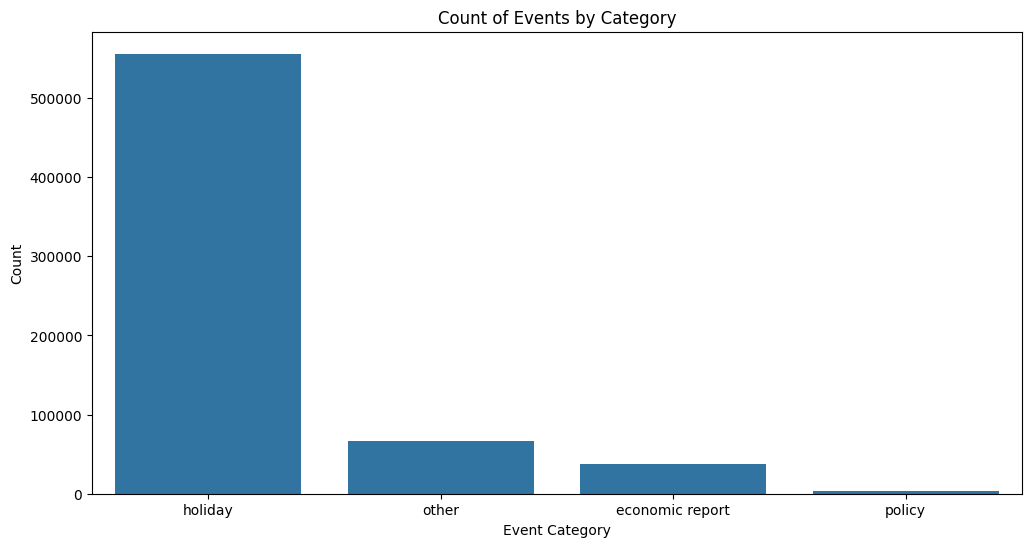

In [ ]:
#display count of events by country :
plt.figure(figsize=(12, 6))
sns.countplot(x='event_category', data=df)
plt.title('Count of Events by Category')
plt.xlabel('Event Category')
plt.ylabel('Count')
plt.show()

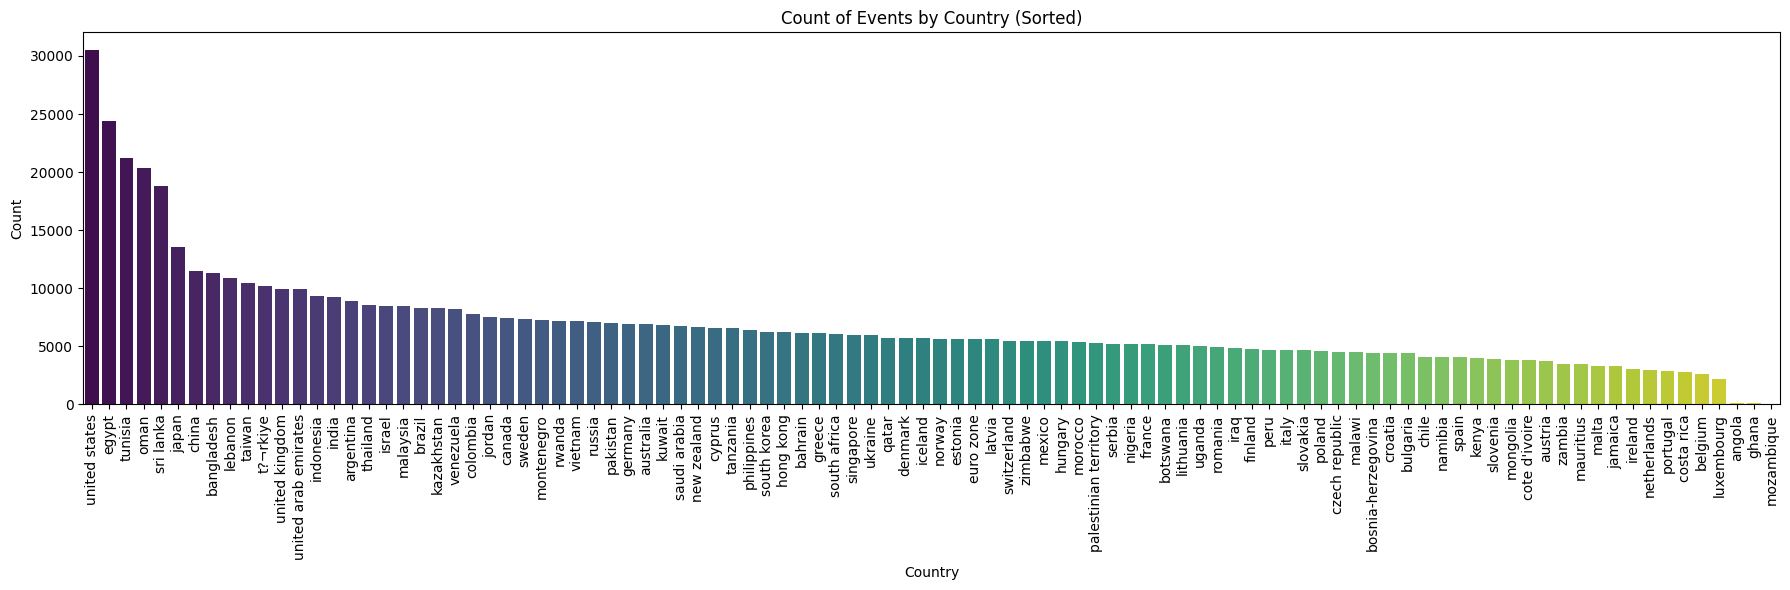

In [ ]:
#display and calculate event counts per country and sort them :
events_per_country_sorted = df['zone'].value_counts().reset_index()
events_per_country_sorted.columns = ['Country', 'Number of Events']
events_per_country_sorted = events_per_country_sorted.sort_values(by='Number of Events', ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x='Country', y='Number of Events', data=events_per_country_sorted, palette='viridis', hue='Country', legend=False)
plt.title('Count of Events by Country (Sorted)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

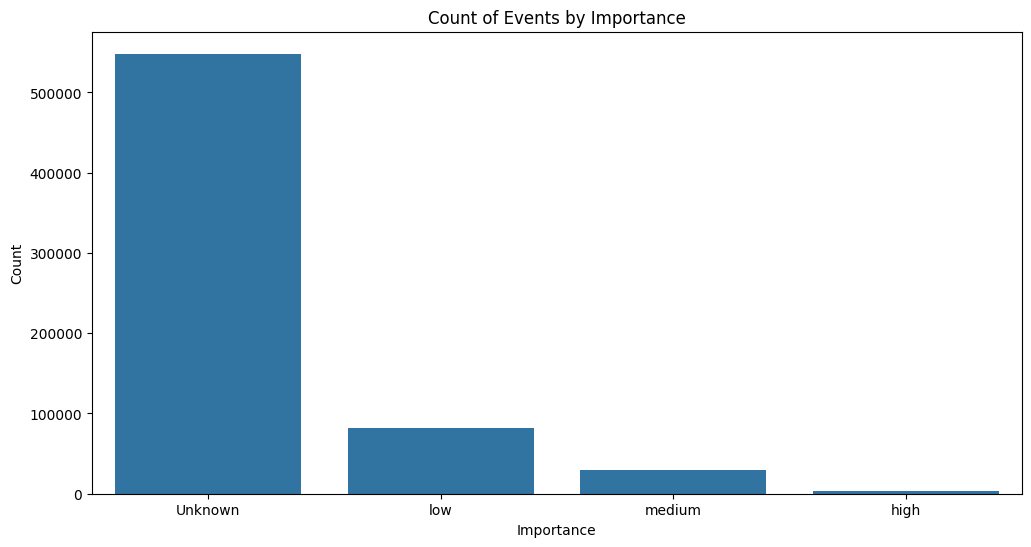

In [ ]:
#display the count of events by importance :
plt.figure(figsize=(12, 6))
sns.countplot(x='importance', data=df)
plt.title('Count of Events by Importance')
plt.xlabel('Importance')
plt.ylabel('Count')
plt.show()